<a href="https://colab.research.google.com/github/tsabitanajma/Text-Classification-with-Machine-Learning/blob/main/Text_Classification_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TEXT CLASSIFICATION WITH MACHINE LEARNING**

Name : Tsabita Bahiratu Najma

No : 16

##About Dataset

The raw data is collected through web scrapping Subreddits and is cleaned using multiple NLP techniques. The data is only in English language. It mainly targets mental health classification.

Data source: https://www.kaggle.com/datasets/infamouscoder/depression-reddit-cleaned

##Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
folder_path = "/content/drive/MyDrive/Celerates DSAI/"

In [ ]:
df = pd.read_csv(folder_path + "depression_dataset.csv")
print(df.shape)
df.head()

(7731, 2)


,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


## Pre Processing data

In [ ]:
# Label proportion
df["is_depression"].value_counts()

,count
is_depression,
0,3900
1,3831


The proportion of the 'is_depression' label values (0 and 1) does not differ significantly and indicating a balanced distribution.

In [ ]:
# Check missing value
df.isnull().sum()

,0
clean_text,0
is_depression,0


The dataset contains no missing values.

In [ ]:
# Split data into X and y
X = df['clean_text']
y = df['is_depression']

In [ ]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in stop_words])


X_train = X_train.apply(remove_stopwords)
X_test = X_test.apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Stem and Lemmatization
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_and_lemmatize_text(text):
  words = text.split()
  stemmed_words = [stemmer.stem(word) for word in words]
  lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]
  return " ".join(lemmatized_words)


X_train = X_train.apply(stem_and_lemmatize_text)
X_test = X_test.apply(stem_and_lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## Count Unique Word

In [ ]:
from collections import Counter

# Assuming X_train is a pandas Series or list of strings
def count_unique_words(X_train):
  """Counts the total number of unique words in X_train."""
  all_words = []
  for text in X_train:
    words = text.lower().split()
    all_words.extend(words)
  word_counts = Counter(all_words)
  return len(word_counts)


unique_word_count = count_unique_words(X_train)
print("Total unique words in X_train:", unique_word_count)

Total unique words in X_train: 13349


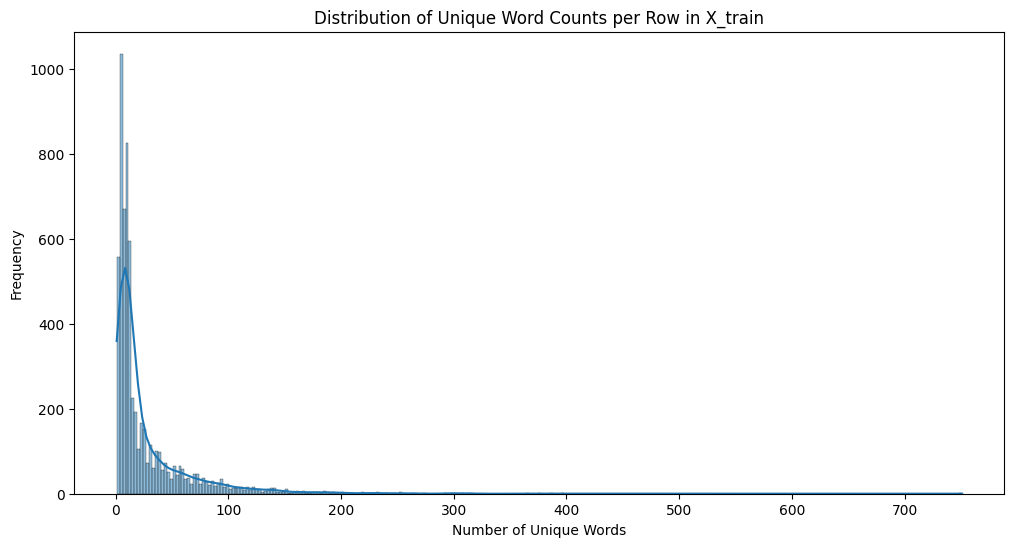

In [ ]:
# Assuming X_train is a pandas Series
unique_word_counts = X_train.apply(lambda x: len(set(x.split())))

# Create a distribution plot using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(unique_word_counts, kde=True)
plt.title('Distribution of Unique Word Counts per Row in X_train')
plt.xlabel('Number of Unique Words')
plt.ylabel('Frequency')
plt.show()

## Word Cloud

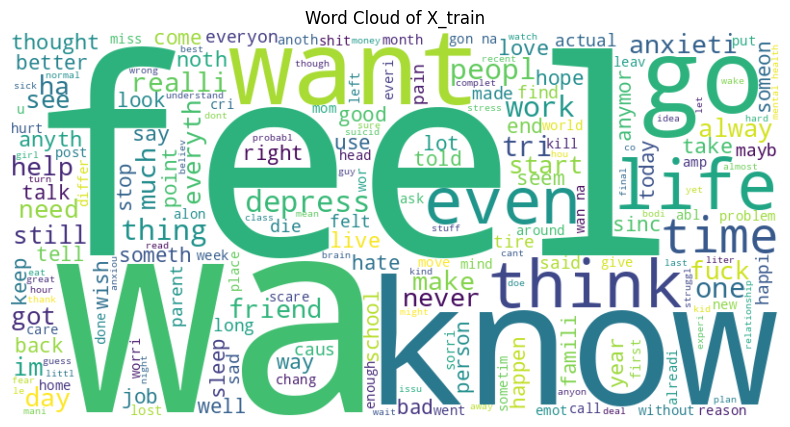

In [ ]:
from wordcloud import WordCloud

# Assuming X_train is a pandas Series
all_text = ' '.join(X_train)

# Generate the word cloud
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='white').generate(all_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of X_train')
plt.show()

## Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1,3),
    max_features=50000
)
vectorizer.fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
print(X_train_vectorized)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 248225 stored elements and shape (6184, 50000)>
  Coords	Values
  (0, 876)	0.08864161421725142
  (0, 891)	0.20083830883723008
  (0, 2771)	0.14257768449113595
  (0, 6352)	0.1415309553835346
  (0, 6431)	0.21752303833153003
  (0, 6432)	0.21752303833153003
  (0, 14164)	0.11174435599896361
  (0, 14404)	0.20776309724268832
  (0, 14405)	0.21752303833153003
  (0, 22131)	0.07173033268352637
  (0, 25229)	0.1281337323828331
  (0, 25236)	0.20776309724268832
  (0, 25636)	0.05937233129178889
  (0, 25871)	0.0768283577742023
  (0, 26005)	0.1910783677483884
  (0, 28211)	0.07583876651393635
  (0, 28294)	0.20776309724268832
  (0, 28471)	0.12484622588923472
  (0, 28768)	0.1442384102793659
  (0, 32561)	0.059338618434037156
  (0, 32997)	0.17068308086250752
  (0, 32998)	0.20776309724268832
  (0, 34101)	0.07270826072012247
  (0, 34212)	0.20083830883723008
  (0, 34381)	0.09891923066657113
  :	:
  (6181, 48254)	0.09424234924515727
  (6181, 48260)	0.1

## Modeling and Evaluation

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_vectorized, y_train)

DecisionTreeClassifier()

In [ ]:
# Predict on the training data
y_pred_train = dt_model.predict(X_train_vectorized)

# Calculate training accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)

# Predict on the test data
y_pred = dt_model.predict(X_test_vectorized)

# Calculate test accuracy
accuracy_test = accuracy_score(y_test, y_pred)

print("Train Accuracy:", accuracy_train)
print(classification_report(y_train, y_pred_train))

print("Test Accuracy:", accuracy_test)
print(classification_report(y_test, y_pred))

Train Accuracy: 0.9990297542043984
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3117
           1       1.00      1.00      1.00      3067

    accuracy                           1.00      6184
   macro avg       1.00      1.00      1.00      6184
weighted avg       1.00      1.00      1.00      6184

Test Accuracy: 0.9276018099547512
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       783
           1       0.95      0.90      0.92       764

    accuracy                           0.93      1547
   macro avg       0.93      0.93      0.93      1547
weighted avg       0.93      0.93      0.93      1547



### SVM

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_vectorized, y_train)

SVC()

In [ ]:
# Predict on the training data
y_pred_train = svm_model.predict(X_train_vectorized)

# Calculate training accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)

# Predict on the test data
y_pred = svm_model.predict(X_test_vectorized)

# Calculate test accuracy
accuracy_test = accuracy_score(y_test, y_pred)

print("Train Accuracy:", accuracy_train)
print(classification_report(y_train, y_pred_train))

print("Test Accuracy:", accuracy_test)
print(classification_report(y_test, y_pred))

Train Accuracy: 0.9975743855109961
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3117
           1       1.00      1.00      1.00      3067

    accuracy                           1.00      6184
   macro avg       1.00      1.00      1.00      6184
weighted avg       1.00      1.00      1.00      6184

Test Accuracy: 0.9553975436328378
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       783
           1       0.96      0.95      0.95       764

    accuracy                           0.96      1547
   macro avg       0.96      0.96      0.96      1547
weighted avg       0.96      0.96      0.96      1547



### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [ ]:
# Predict on the training data
y_pred_train = nb_model.predict(X_train_vectorized)

# Calculate training accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)

# Predict on the test data
y_pred = nb_model.predict(X_test_vectorized)

# Calculate test accuracy
accuracy_test = accuracy_score(y_test, y_pred)

print("Train Accuracy:", accuracy_train)
print(classification_report(y_train, y_pred_train))

print("Test Accuracy:", accuracy_test)
print(classification_report(y_test, y_pred))

Train Accuracy: 0.9372574385510997
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      3117
           1       0.89      1.00      0.94      3067

    accuracy                           0.94      6184
   macro avg       0.94      0.94      0.94      6184
weighted avg       0.94      0.94      0.94      6184

Test Accuracy: 0.8196509372979961
              precision    recall  f1-score   support

           0       0.98      0.66      0.79       783
           1       0.74      0.99      0.84       764

    accuracy                           0.82      1547
   macro avg       0.86      0.82      0.82      1547
weighted avg       0.86      0.82      0.81      1547



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_vectorized, y_train)

LogisticRegression()

In [ ]:
# Predict on the training data
y_pred_train = lr_model.predict(X_train_vectorized)

# Calculate training accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)

# Predict on the test data
y_pred = lr_model.predict(X_test_vectorized)

# Calculate test accuracy
accuracy_test = accuracy_score(y_test, y_pred)

print("Train Accuracy:", accuracy_train)
print(classification_report(y_train, y_pred_train))

print("Test Accuracy:", accuracy_test)
print(classification_report(y_test, y_pred))

Train Accuracy: 0.973156532988357
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3117
           1       0.98      0.96      0.97      3067

    accuracy                           0.97      6184
   macro avg       0.97      0.97      0.97      6184
weighted avg       0.97      0.97      0.97      6184

Test Accuracy: 0.9528118939883645
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       783
           1       0.95      0.95      0.95       764

    accuracy                           0.95      1547
   macro avg       0.95      0.95      0.95      1547
weighted avg       0.95      0.95      0.95      1547



### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_vectorized, y_train)

KNeighborsClassifier()

In [ ]:
# Predict on the training data
y_pred_train = knn_model.predict(X_train_vectorized)

# Calculate training accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)

# Predict on the test data
y_pred = knn_model.predict(X_test_vectorized)

# Calculate test accuracy
accuracy_test = accuracy_score(y_test, y_pred)

print("Train Accuracy:", accuracy_train)
print(classification_report(y_train, y_pred_train))

print("Test Accuracy:", accuracy_test)
print(classification_report(y_test, y_pred))

Train Accuracy: 0.5514230271668823
              precision    recall  f1-score   support

           0       0.53      1.00      0.69      3117
           1       0.98      0.10      0.18      3067

    accuracy                           0.55      6184
   macro avg       0.75      0.55      0.43      6184
weighted avg       0.75      0.55      0.44      6184

Test Accuracy: 0.5216548157724629
              precision    recall  f1-score   support

           0       0.51      0.99      0.68       783
           1       0.85      0.04      0.07       764

    accuracy                           0.52      1547
   macro avg       0.68      0.52      0.38      1547
weighted avg       0.68      0.52      0.38      1547



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vectorized, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the training data
y_pred_train = rf_model.predict(X_train_vectorized)

# Calculate training accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)

# Predict on the test data
y_pred = rf_model.predict(X_test_vectorized)

# Calculate test accuracy
accuracy_test = accuracy_score(y_test, y_pred)

print("Train Accuracy:", accuracy_train)
print(classification_report(y_train, y_pred_train))

print("Test Accuracy:", accuracy_test)
print(classification_report(y_test, y_pred))

Train Accuracy: 0.9990297542043984
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3117
           1       1.00      1.00      1.00      3067

    accuracy                           1.00      6184
   macro avg       1.00      1.00      1.00      6184
weighted avg       1.00      1.00      1.00      6184

Test Accuracy: 0.9392372333548804
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       783
           1       0.99      0.88      0.93       764

    accuracy                           0.94      1547
   macro avg       0.94      0.94      0.94      1547
weighted avg       0.94      0.94      0.94      1547



## Conclusion

1. Based on the text classification models that have been developed, the following results were obtained:

  * Decision Tree Model

    * Accuracy on the training data: 99.9%

    * Accuracy on the testing data: 92.63%
  * SVM Model
    * Accuracy on the training data: 99.8%

    * Accuracy on the testing data: 95.6%
  * Naive Bayes Model
    * Accuracy on the training data: 93.7%

    * Accuracy on the testing data: 82%
  * Logistik Regression Model
    * Accuracy on the training data: 97.3%

    * Accuracy on the testing data: 95.3%

  * KNN Model
    * Accuracy on the training data: 55.1%

    * Accuracy on the testing data: 52.2%
  * Random Forest Model
    * Accuracy on the training data: 99.9%

    * Accuracy on the testing data: 93.9%
  
  2. Based on the training and testing accuracy of each model, it can be concluded that the **Support Vector Machine (SVM)** is the best model for classifying depression in the given dataset, achieving an **accuracy of 99.8% on the training data and 95.6% on the testing data**.

In [ ]:
# Save model
import pickle
pickle.dump(svm_model, open("/content/drive/MyDrive/depression classification_svm model.pkl", "wb"))